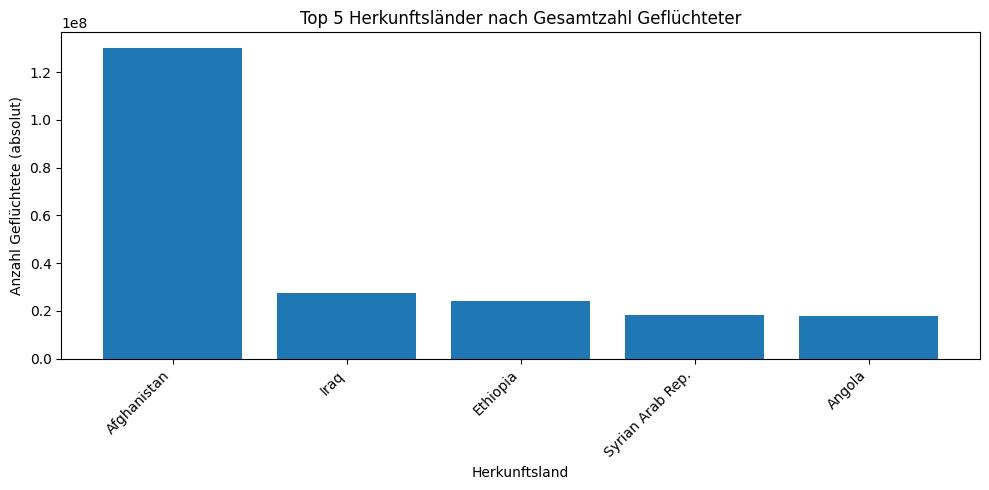

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

path = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/output_csv_files/Origin_refugees_per_capita.csv"
df = pd.read_csv(path)

# Länder-Spalte automatisch finden
possible_cols = ["country", "Origin", "Location", "Country Name", "Origin_country"]
country_col = next((col for col in df.columns if col in possible_cols), None)
if country_col is None:
    raise ValueError("Keine passende Länder-Spalte gefunden.")

# prüfen ob Refugee_amount existiert
if "Refugee_amount" not in df.columns:
    raise ValueError("Spalte 'Refugee_amount' nicht gefunden.")

# Top 5 Herkunftsländer
origin_totals = df.groupby(country_col)["Refugee_amount"].sum().sort_values(ascending=False)
top_origins = origin_totals.head(5)

plt.figure(figsize=(10, 5))
plt.bar(top_origins.index, top_origins.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Anzahl Geflüchtete (absolut)")
plt.xlabel("Herkunftsland")
plt.title("Top 5 Herkunftsländer nach Gesamtzahl Geflüchteter")
plt.tight_layout()
plt.show()


C:\Users\paulk\AppData\Local\Temp\ipykernel_73016\3990188955.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


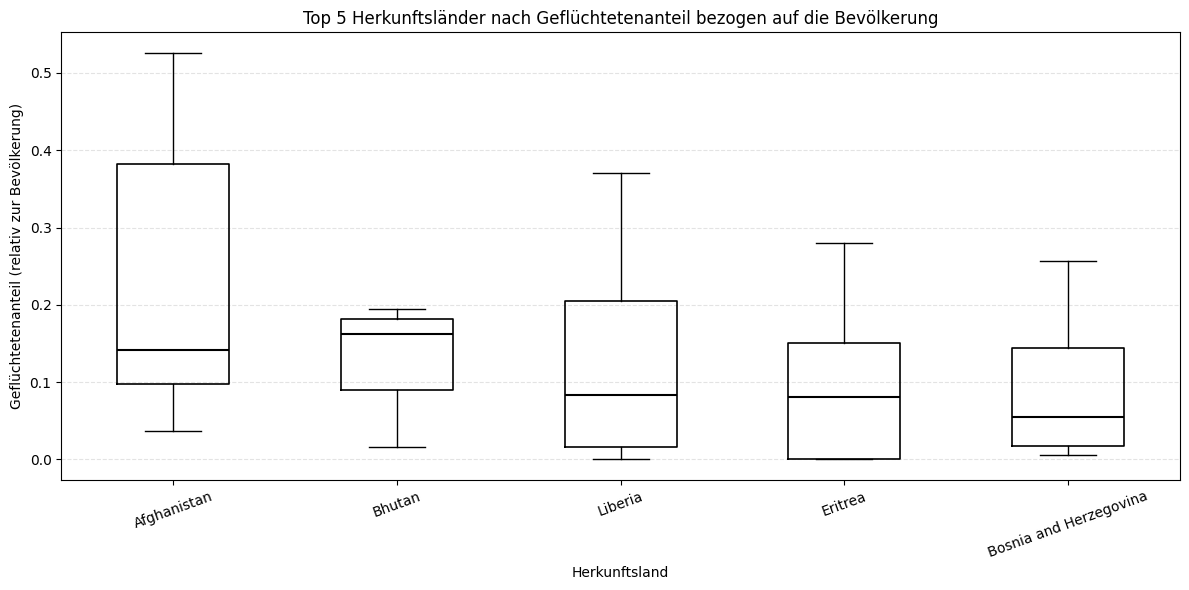

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

path = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/output_csv_files/Origin_refugees_per_capita.csv"
df = pd.read_csv(path)

country_col = "country"
share_col = "refugee_share"

# Top 5 Länder mit höchstem Durchschnittsanteil Geflüchteter
avg_share = df.groupby(country_col)[share_col].mean().sort_values(ascending=False)
top5 = avg_share.head(5).index
df_top5 = df[df[country_col].isin(top5)]

plt.figure(figsize=(12, 6))
plt.boxplot(
    [df_top5[df_top5[country_col] == c][share_col] for c in top5],
    labels=top5,
    medianprops=dict(color="black", linewidth=1.5),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    boxprops=dict(color="black", linewidth=1.2)
)

plt.title("Top 5 Herkunftsländer nach Geflüchtetenanteil bezogen auf die Bevölkerung")
plt.xlabel("Herkunftsland")
plt.ylabel("Geflüchtetenanteil (relativ zur Bevölkerung)")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.35)

plt.tight_layout()
plt.show()


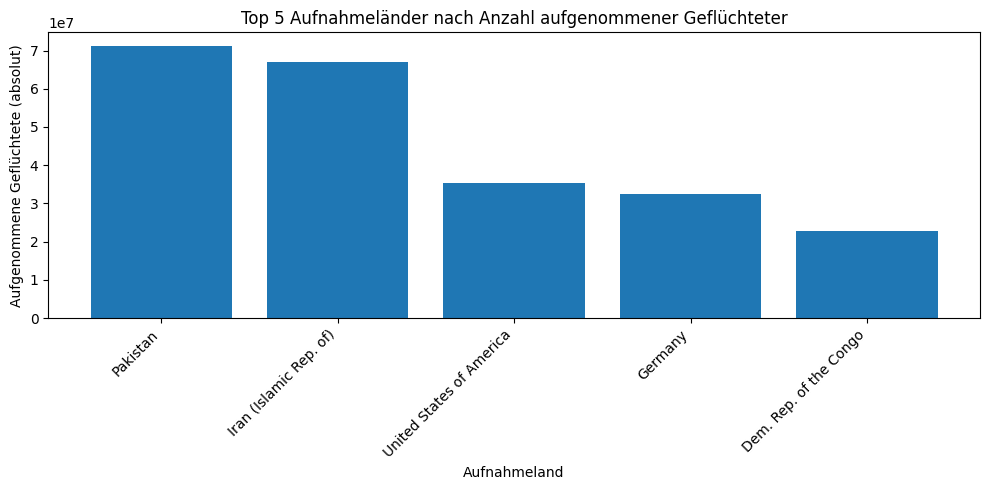

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

path = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/output_csv_files/Destination_refugees_per_capita.csv"
df = pd.read_csv(path)

country_col = "country"
amount_col = "Refugee_amount"

# Top 5 Aufnahmeländer (absolute Zahlen)
dest_totals = df.groupby(country_col)[amount_col].sum().sort_values(ascending=False)
top5_amount = dest_totals.head(5)

plt.figure(figsize=(10, 5))
plt.bar(top5_amount.index, top5_amount.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Aufgenommene Geflüchtete (absolut)")
plt.xlabel("Aufnahmeland")
plt.title("Top 5 Aufnahmeländer nach Anzahl aufgenommener Geflüchteter")
plt.tight_layout()
plt.show()


C:\Users\paulk\AppData\Local\Temp\ipykernel_73016\1273289217.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


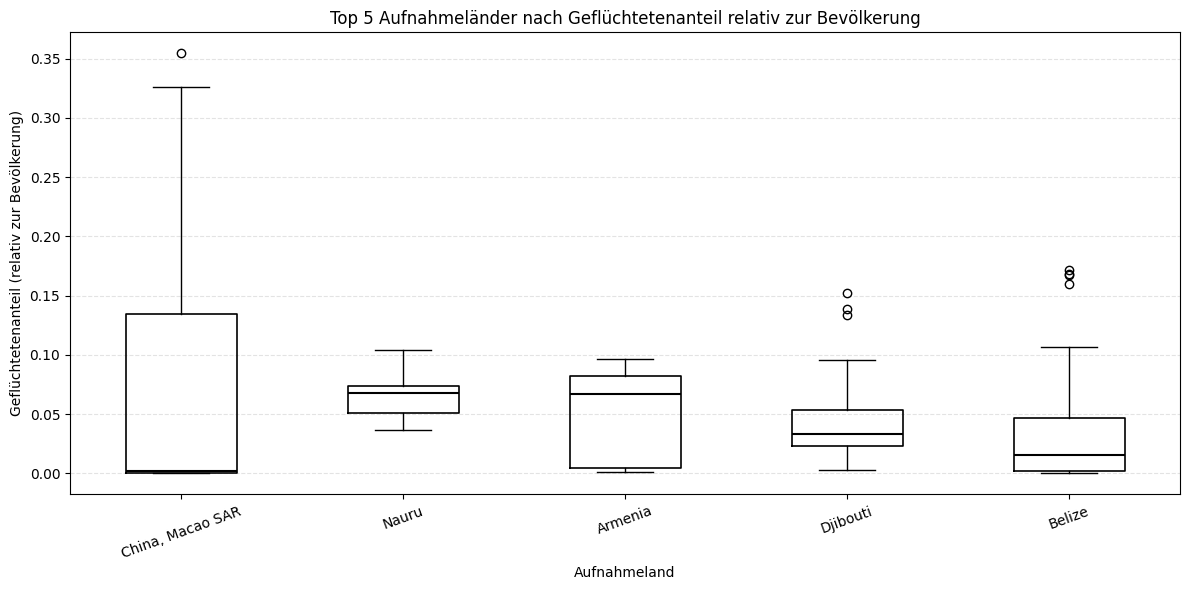

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

path = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/output_csv_files/Destination_refugees_per_capita.csv"
df = pd.read_csv(path)

country_col = "country"
share_col = "refugee_share"

# Top 5 Länder nach geflüchtetenanteil (relativ)
avg_share = df.groupby(country_col)[share_col].mean().sort_values(ascending=False)
top5_share = avg_share.head(5).index

df_top5_share = df[df[country_col].isin(top5_share)]

plt.figure(figsize=(12, 6))
plt.boxplot(
    [df_top5_share[df_top5_share[country_col] == c][share_col] for c in top5_share],
    labels=top5_share,
    medianprops=dict(color="black", linewidth=1.5),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    boxprops=dict(color="black", linewidth=1.2)
)

plt.title("Top 5 Aufnahmeländer nach Geflüchtetenanteil relativ zur Bevölkerung")
plt.xlabel("Aufnahmeland")
plt.ylabel("Geflüchtetenanteil (relativ zur Bevölkerung)")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.35)

plt.tight_layout()
plt.show()
